In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## Merging all the 12 months of sales data into one CSV file

In [3]:
path = r'D:\DataSets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

## Understanding the Data

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
df.shape

(186849, 6)

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


## Cleaning the data

### Getting the rows with Null values

In [8]:
df_Null = df[df.isna().any(axis=1)]
df_Null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


### Clearing the Null values from the Dataframe

In [9]:
df = df.dropna(how = 'all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Finding the duplicate rows with the column names in it

In [10]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185163,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185550,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186562,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186631,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Converting the dataframe columns with correct data type

In [32]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float')
pd.options.mode.chained_assignment = None   # default='warn' # Removing the chain assignment warning

## Adding new columns

### 1 - Add Month column

In [14]:
pd.options.mode.chained_assignment = None  # default='warn' # Removing the chain assignment warning
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### 2 - Add Sales column

In [15]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
df = df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'Purchase Address']]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04-07-2019 22:30,4,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,04-12-2019 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,04-12-2019 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


### Getting months and number of sales associated to the months

In [17]:
result = df.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Text(0.5, 0, 'Months')

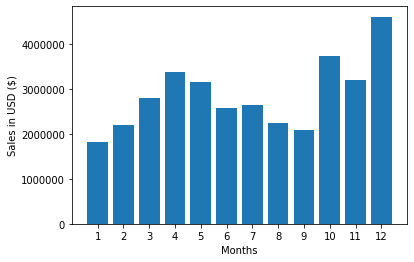

In [18]:
plt.bar(range(1, 13), result['Sales'])
plt.xticks(range(1, 13))
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')

### 3 - Add City column

In [19]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04-07-2019 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,600.00,04-12-2019 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,04-12-2019 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


### Cities with the sales associated to them

In [20]:
result_city = df.groupby('City').sum()
result_city

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06,104794
Austin TX,11153,1.809874e+06,1.819582e+06,69829
Boston MA,22528,3.637410e+06,3.661642e+06,141112
Dallas TX,16730,2.752628e+06,2.767975e+06,104620
Los Angeles CA,33289,5.421435e+06,5.452571e+06,208325
New York City NY,27932,4.635371e+06,4.664317e+06,175741
Portland ME,2750,4.471893e+05,4.497583e+05,17144
Portland OR,11303,1.860558e+06,1.870732e+06,70621
San Francisco CA,50239,8.211462e+06,8.262204e+06,315520


Text(0.5, 0, 'Cities')

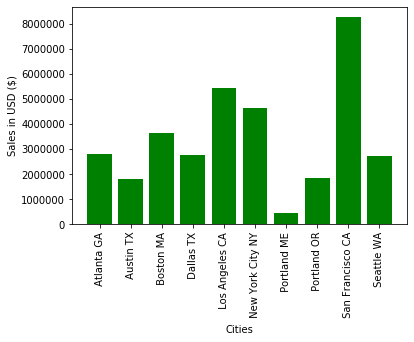

In [21]:
Cities = [x for x, df in df.groupby('City')]
plt.bar(Cities, result_city['Sales'], color = 'green')
plt.xticks(Cities, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')

### What time could be best to display advertisments to maximize likelihood of customer buying a product?

- Converting Order Date into datetime format to extract hour and minute efficiently

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


In [23]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df = df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Hour', 'Minute', 'Month', 'Purchase Address', 'City']]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Minute,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,46,4,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


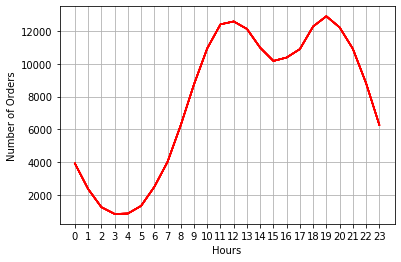

In [24]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby('Hour').count(), 'r')
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()

### What are the product which are most often getting sold together  

In [25]:
new_df = df[df['Order ID'].duplicated(keep = False)] # Creating new DataFrame to extract meaning full information from similar Order ID
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Minute,Month,Purchase Address,City
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
17,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,19,42,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA
18,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,19,42,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA
29,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,11,31,4,"823 Highland St, Boston, MA 02215",Boston MA


## Creating a new collumn Group

In [26]:
new_df['Group'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # Making a new column Group with all product names of the same Order ID
new_df = new_df[['Order ID', 'Group']].drop_duplicates() 
new_df

,Order ID,Group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186780,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186782,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186790,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186802,259314,"Wired Headphones,AAA Batteries (4-pack)"


### 2 most commonly bought together products

In [27]:
count = Counter()
for rows in new_df['Group']:
    row_list = rows.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 3 most commonly bought together products

In [28]:
count = Counter()
for rows in new_df['Group']:
    row_list = rows.split(',')
    count.update(Counter(combinations(row_list, 3)))
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Minute,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,46,4,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


### Finding the product sold the most and reason

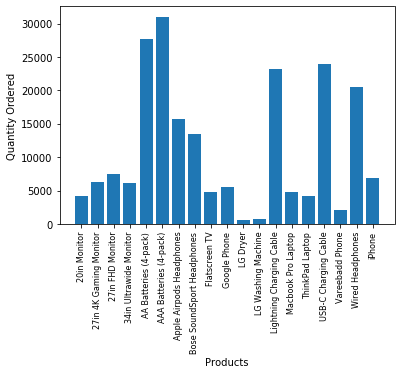

In [30]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

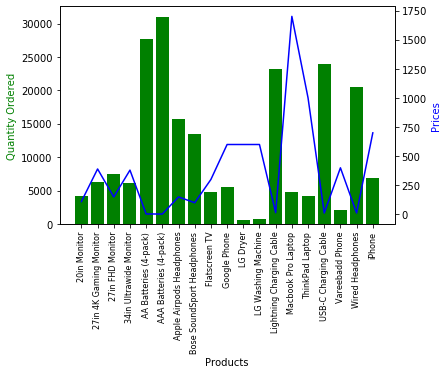

In [31]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, color = 'b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()